### **Simple Linear Regression**
In this regression task I will predict the percentage a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables, the amount of study time in hours and the scores.

*By Eskender Kidane,*
*Intern at The Sparks Foundation*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('student_scores.csv')
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


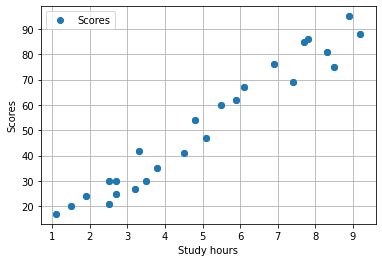

In [3]:
%matplotlib inline
df.plot(x='Hours', y='Scores', style='o')
plt.scatter(df.Hours, df.Scores)
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

*From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.*

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### **Training the Model**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [6]:
model_reg = linear_model.LinearRegression()
model_reg.fit(X_train, y_train)
print("Training complete.")

Training complete.


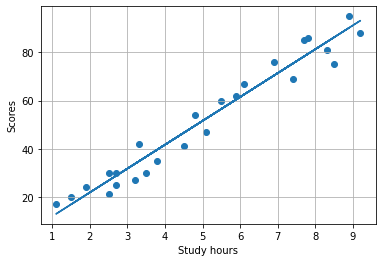

In [7]:
# Plotting the regression line (y=mx+b)
line = model_reg.coef_*X+model_reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.xlabel('Study hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

### **Making Predictions**
Now that the model is trained, it's time to make some predictions.

In [8]:
# Predicting a score for a 9.25 hrs of studying time
hours = 9.25
sample_pred = model_reg.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(sample_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737535


In [9]:
print(X_test) # Testing data - In Hours
y_pred = model_reg.predict(X_test) # Predicting scores based on the test values

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual Scores': y_test, 'Predicted Scores': y_pred})  
df

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, the mean square error is used. There are many such metrics.



In [11]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
